# Nareg Najarian, ID: A09185210

# Imports

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [256]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import logit

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,\
    QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [257]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    classification_report, precision_score, recall_score, f1_score,\
    roc_curve, auc, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.datasets.samples_generator import make_blobs

# Problem 1: Binary Classification, LR

In [258]:
X1,y1 = make_classification(n_samples=4000, n_features=15, n_informative=2,\
                        n_clusters_per_class=1, random_state=10,\
                        class_sep=1, flip_y=0.05, n_classes=2)

In [259]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2, random_state = 10)

In [260]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X1_train.shape, X1_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y1_train.shape, y1_test.shape))

Train feature set shape: (3200, 15), Test feature set shape: (800, 15) 
Train set labels shape: (3200,), Test set labels shape: (800,) 


## 1.1

In [261]:
c_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_results = []

for val in c_param_list:
    log_reg = LogisticRegression(penalty = 'l2', C = val, solver = 'lbfgs')
    kfold = KFold(n_splits=10)
    score = cross_val_score(log_reg, X1_train, y1_train, cv = kfold, scoring = "accuracy")
    score_results.append(score)

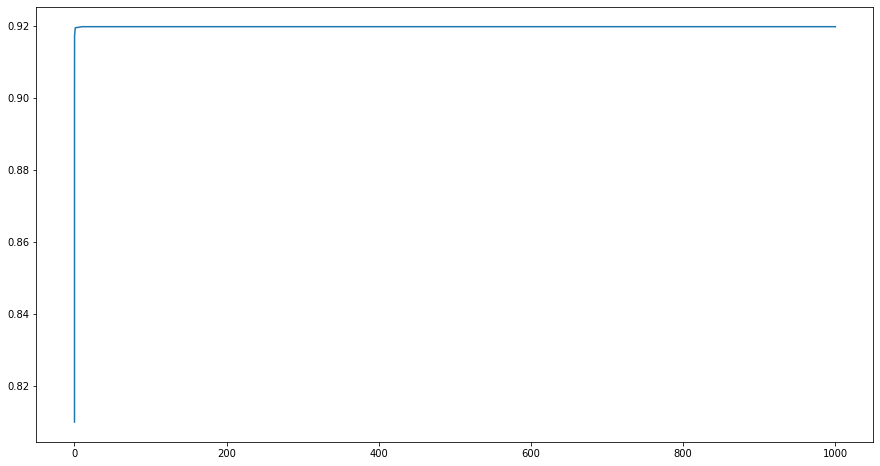

In [262]:
plt.figure(figsize = (15,8)) 
plt.plot(c_param_list, np.mean(np.array(score_results), axis = 1))
plt.show()

In [263]:
avg_cv_scores = np.mean(np.array(score_results), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores)
print("Optimal Value of C: %s" % c_param_list[max_avg_accuracy_index])
print("Accuracy of C: %s" % np.mean(score_results[max_avg_accuracy_index]))

Optimal Value of C: 10
Accuracy of C: 0.9196875


### the optimal value of C is 10 and its corresponding accuracy is 0.9196875

## 1.2

In [264]:
log_reg_optimal = LogisticRegression(penalty = 'l2', C = 10, solver = 'lbfgs')

opt_mod_log_reg_train = log_reg_optimal.fit(X1_train,y1_train)
opt_mod_log_reg_test = log_reg_optimal.fit(X1_test,y1_test)

print("Model Score Train: %s" % opt_mod_log_reg_train.score(X1_train,y1_train))
print("Model Score Test: %s" % opt_mod_log_reg_test.score(X1_test,y1_test))

y1_pred_train = opt_mod_log_reg_train.predict(X1_train)
y1_score_train = opt_mod_log_reg_train.predict_proba(X1_train)

y1_pred_test = opt_mod_log_reg_test.predict(X1_test)
y1_score_test = opt_mod_log_reg_test.predict_proba(X1_test)

Model Score Train: 0.903125
Model Score Test: 0.915


AUC Class 0: 0.9325988972518817
AUC Class 1: 0.9325988972518816


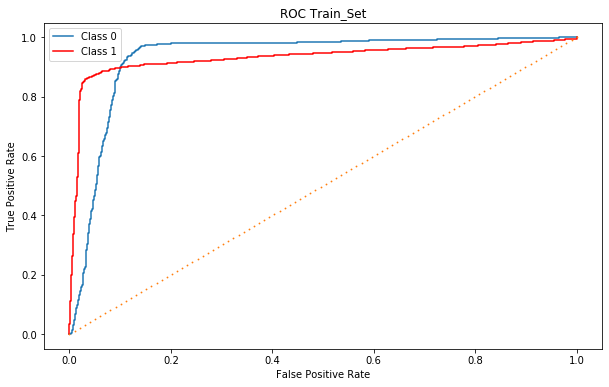

In [265]:
fpr0, tpr0, thresholds0 = roc_curve(y1_train, y1_score_train[:,0], pos_label = 0)
print("AUC Class 0: %s" % auc(fpr0,tpr0))
fpr1, tpr1, thresholds1 = roc_curve(y1_train, y1_score_train[:,1], pos_label = 1)
print("AUC Class 1: %s" % auc(fpr1,tpr1))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(fpr0, tpr0, "-", label = "Class 0")
plt.plot(fpr1, tpr1, "-", color = 'r', label = "Class 1")
plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC Train_Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### The results seem to be acceptable on the train set. Our observations seem to be linearly separable.

AUC Class 0: 0.9351627656712402
AUC Class 1: 0.9351627656712403


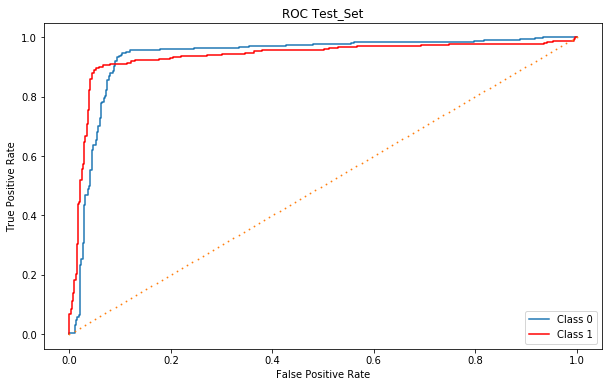

In [266]:
fpr0, tpr0, thresholds0 = roc_curve(y1_test, y1_score_test[:,0], pos_label = 0)
print("AUC Class 0: %s" % auc(fpr0,tpr0))
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_score_test[:,1], pos_label = 1)
print("AUC Class 1: %s" % auc(fpr1,tpr1))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(fpr0, tpr0, "-", label = "Class 0")
plt.plot(fpr1, tpr1, "-", color = 'r', label = "Class 1")
plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC Test_Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### The results of our test set are even better than the results on our train set. This indicates that our model is suitable for this distribution.

In [267]:
print(confusion_matrix(y1_train, y1_pred_train))

[[1538   38]
 [ 272 1352]]


In [268]:
print(confusion_matrix(y1_test, y1_pred_test))

[[395  18]
 [ 50 337]]


### We can see a little bit of imbalance in our confusion matrices

In [269]:
print(classification_report(y1_train, y1_pred_train, digits = 6))

              precision    recall  f1-score   support

           0   0.849724  0.975888  0.908447      1576
           1   0.972662  0.832512  0.897147      1624

    accuracy                       0.903125      3200
   macro avg   0.911193  0.904200  0.902797      3200
weighted avg   0.912115  0.903125  0.902712      3200



In [270]:
print(classification_report(y1_test, y1_pred_test, digits = 6))

              precision    recall  f1-score   support

           0   0.887640  0.956416  0.920746       413
           1   0.949296  0.870801  0.908356       387

    accuracy                       0.915000       800
   macro avg   0.918468  0.913609  0.914551       800
weighted avg   0.917466  0.915000  0.914752       800



### For class 0 precision is higher on test set, and recall is smaller. For class 1 we see the opposite effect

# Problem 2: Multiclass Classification, LDA, QDA

In [271]:
X2,y2 = 𝑚𝑎𝑘𝑒_𝑏𝑙𝑜𝑏𝑠(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠 = [5000,300,150], 𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠 = 10,\
                            𝑟𝑎𝑛𝑑𝑜𝑚_𝑠𝑡𝑎𝑡𝑒 = 10, 𝑐𝑙𝑢𝑠𝑡𝑒𝑟_𝑠𝑡𝑑 = [6, 3, 5])

In [272]:
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

LDA_model = LDA.fit(X2,y2)
QDA_model = QDA.fit(X2,y2)

print("LDA Score: %s" % LDA.score(X2,y2))
print("QDA Score: %s" % QDA.score(X2,y2))

y_LDA_pred = LDA.predict(X2)
y_LDA_score = LDA.predict_proba(X2)

y_QDA_pred = QDA.predict(X2)
y_QDA_score = QDA.predict_proba(X2)

LDA Score: 0.9889908256880734
QDA Score: 0.9922935779816514


## 2.1

AUC LDA Class 0: 0.9981457777777778
AUC QDA Class 0: 0.998612


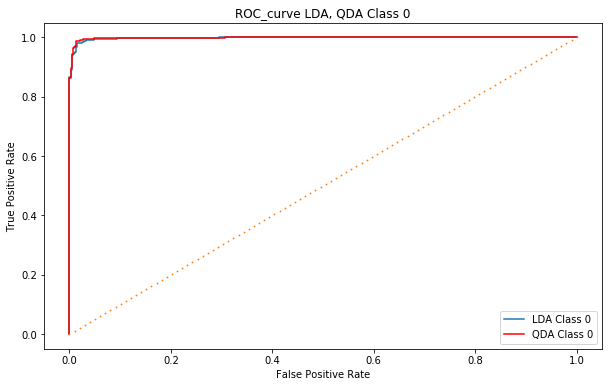

In [273]:
fpr0l, tpr0l, thresholds0l = roc_curve(y2, y_LDA_score[:,0], pos_label = 0)
print("AUC LDA Class 0: %s" % auc(fpr0l,tpr0l))

fpr0q, tpr0q, thresholds0q = roc_curve(y2, y_QDA_score[:,0], pos_label = 0)
print("AUC QDA Class 0: %s" % auc(fpr0q,tpr0q))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))

plt.plot(fpr0l, tpr0l, "-", label = "LDA Class 0")

plt.plot(fpr0q, tpr0q, "-", color = 'r', label = "QDA Class 0")

plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC_curve LDA, QDA Class 0")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC LDA Class 1: 0.9999948220064725
AUC QDA Class 1: 0.9999987055016181


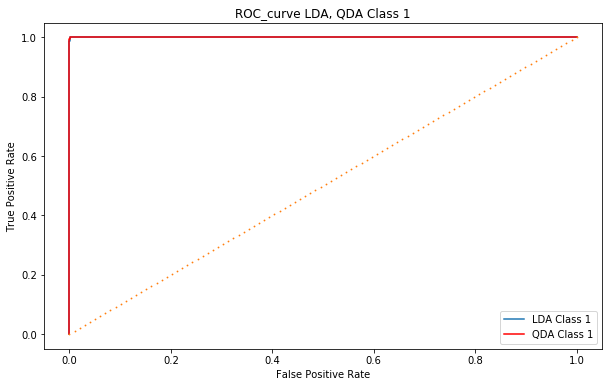

In [274]:
fpr1l, tpr1l, thresholds1l = roc_curve(y2, y_LDA_score[:,1], pos_label = 1)
print("AUC LDA Class 1: %s" % auc(fpr1l,tpr1l))

fpr1q, tpr1q, thresholds1q = roc_curve(y2, y_QDA_score[:,1], pos_label = 1)
print("AUC QDA Class 1: %s" % auc(fpr1q,tpr1q))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))

plt.plot(fpr1l, tpr1l, "-", label = "LDA Class 1")

plt.plot(fpr1q, tpr1q, "-", color = 'r', label = "QDA Class 1")

plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC_curve LDA, QDA Class 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC LDA Class 2: 0.9943069182389938
AUC QDA Class 2: 0.9958779874213837


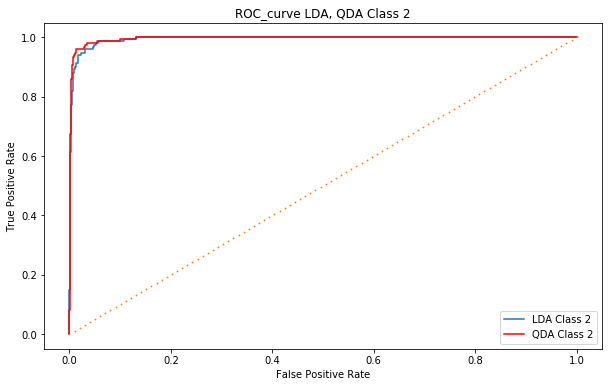

In [275]:
fpr2l, tpr2l, thresholds2l = roc_curve(y2, y_LDA_score[:,2], pos_label = 2)
print("AUC LDA Class 2: %s" % auc(fpr2l,tpr2l))

fpr2q, tpr2q, thresholds2q = roc_curve(y2, y_QDA_score[:,2], pos_label = 2)
print("AUC QDA Class 2: %s" % auc(fpr2q,tpr2q))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))

plt.plot(fpr2l, tpr2l, "-", label = "LDA Class 2")

plt.plot(fpr2q, tpr2q, "-", color = 'r', label = "QDA Class 2")

plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC_curve LDA, QDA Class 2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [276]:
print("accuracy LDA: %s" % accuracy_score(y2, y_LDA_pred))
print("accuracy QDA: %s" % accuracy_score(y2, y_QDA_pred))

accuracy LDA: 0.9889908256880734
accuracy QDA: 0.9922935779816514


### Both model are performing very well. QDA is performing slightly better. The reason behind this, might be the fact that the number of observations are not terribly big, and the possibility of the observations being linearly separable.

## 2.2

AUC LDA Class 0: 0.9998291196969871
AUC QDA Class 0: 0.9998717872219474


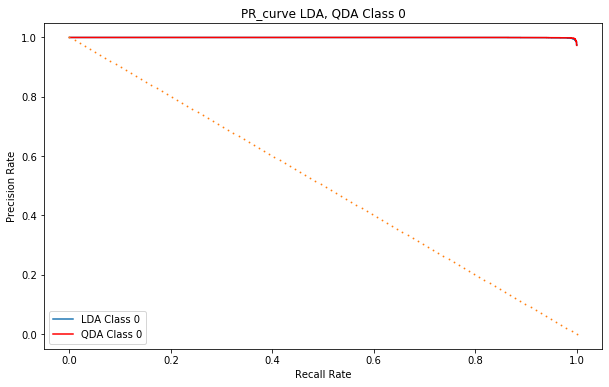

In [277]:
p0l, r0l, thresholds0l = precision_recall_curve(y2, y_LDA_score[:,0], pos_label = 0)
print("AUC LDA Class 0: %s" % auc(r0l,p0l))

p0q, r0q, thresholds0q = precision_recall_curve(y2, y_QDA_score[:,0], pos_label = 0)
print("AUC QDA Class 0: %s" % auc(r0q,p0q))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))

plt.plot(r0l, p0l, "-", label = "LDA Class 0")

plt.plot(r0q, p0q, "-", color = 'r', label = "QDA Class 0")

plt.plot(x, -x+1, ".", markersize = 1.6)
plt.title("PR_curve LDA, QDA Class 0")
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.legend()
plt.show()

AUC LDA Class 1: 0.9999114029807588
AUC QDA Class 1: 0.9999777776543197


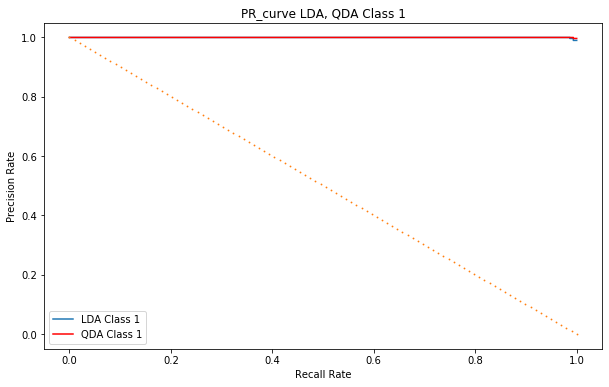

In [278]:
p1l, r1l, thresholds1l = precision_recall_curve(y2, y_LDA_score[:,1], pos_label = 1)
print("AUC LDA Class 1: %s" % auc(r1l,p1l))

p1q, r1q, thresholds1q = precision_recall_curve(y2, y_QDA_score[:,1], pos_label = 1)
print("AUC QDA Class 1: %s" % auc(r1q,p1q))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))

plt.plot(r1l, p1l, "-", label = "LDA Class 1")

plt.plot(r1q, p1q, "-", color = 'r', label = "QDA Class 1")

plt.plot(x, -x+1, ".", markersize = 1.6)
plt.title("PR_curve LDA, QDA Class 1")
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.legend()
plt.show()

AUC LDA Class 2: 0.8801461738224386
AUC QDA Class 2: 0.9062838530653812


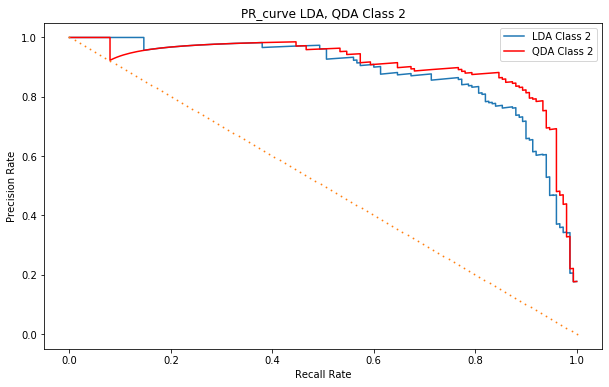

In [279]:
p2l, r2l, thresholds2l = precision_recall_curve(y2, y_LDA_score[:,2], pos_label = 2)
print("AUC LDA Class 2: %s" % auc(r2l,p2l))

p2q, r2q, thresholds2q = precision_recall_curve(y2, y_QDA_score[:,2], pos_label = 2)
print("AUC QDA Class 2: %s" % auc(r2q,p2q))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))

plt.plot(r2l, p2l, "-", label = "LDA Class 2")

plt.plot(r2q, p2q, "-", color = 'r', label = "QDA Class 2")

plt.plot(x, -x+1, ".", markersize = 1.6)
plt.title("PR_curve LDA, QDA Class 2")
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.legend()
plt.show()

### Both models are predicting classes 0 and 1 extremely well. However, Their performance is shrinking on class 2. This might be due to our class imbalance problem. In this case QDA is showing better results

# Problem 3: Binary Classification, KNN

## 3.1

In [280]:
k = np.arange(1,91)
k_result = []
for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn,X1_train,y1_train, cv = kfold, scoring = "accuracy")
    k_result.append(score)

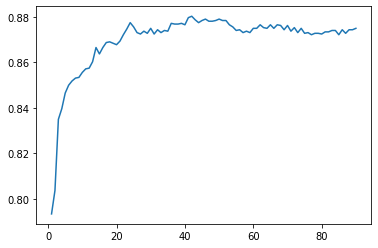

In [281]:
k_mean = np.mean(np.array(k_result), axis = 1)
plt.plot(k,k_mean)
plt.show()

In [282]:
index = np.argmax(k_mean)
print("k = %s" % index)
print("accuracy_train = %s" % k_mean[index])

k = 41
accuracy_train = 0.8803124999999999


## The optimal value for k is 41, and the corresponding accuracy is 0.880312

## 3.2

In [283]:
knn_optimal = KNeighborsClassifier(n_neighbors = 41)
knn_optimal.fit(X1_test,y1_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                     weights='uniform')

In [284]:
y_pred_test = knn_optimal.predict(X1_test)
y_score_test = knn_optimal.predict_proba(X1_test)

In [285]:
print("accuracy_test = %s" % accuracy_score(y1_test, y_pred_test))

accuracy_test = 0.89


### accuracy_train = 0.88 and accuracy_test = 0.89. Therefore, the difference is very small and in favour of the test set.

## 3.3

AUC Class 0 LR: 0.9351627656712402
AUC Class 0 KNN: 0.9363483929900956


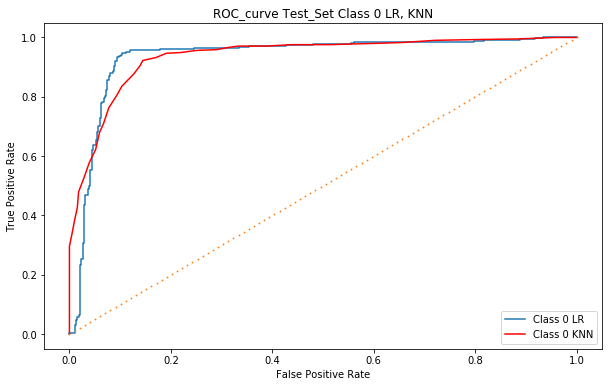

In [286]:
fpr0lr, tpr0lr, thresholds0lr = roc_curve(y1_test, y1_score_test[:,0], pos_label = 0)
print("AUC Class 0 LR: %s" % auc(fpr0lr,tpr0lr))
fpr0knn, tpr0knn, thresholds0knn = roc_curve(y1_test, y_score_test[:,0], pos_label = 0)
print("AUC Class 0 KNN: %s" % auc(fpr0knn,tpr0knn))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(fpr0lr, tpr0lr, "-", label = "Class 0 LR")
plt.plot(fpr0knn, tpr0knn, "-", color = 'r', label = "Class 0 KNN")
plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC_curve Test_Set Class 0 LR, KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC Class 1 LR: 0.9351627656712403
AUC Class 1 KNN: 0.9363483929900959


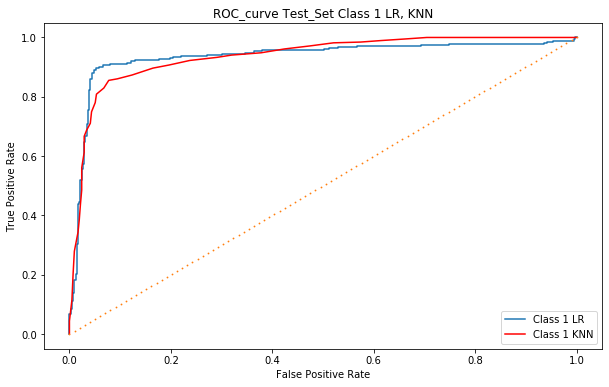

In [287]:
fpr1lr, tpr1lr, thresholds1lr = roc_curve(y1_test, y1_score_test[:,1], pos_label = 1)
print("AUC Class 1 LR: %s" % auc(fpr1lr,tpr1lr))
fpr1knn, tpr1knn, thresholds1knn = roc_curve(y1_test, y_score_test[:,1], pos_label = 1)
print("AUC Class 1 KNN: %s" % auc(fpr1knn,tpr1knn))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(fpr1lr, tpr1lr, "-", label = "Class 1 LR")
plt.plot(fpr1knn, tpr1knn, "-", color = 'r', label = "Class 1 KNN")
plt.plot(x, x, ".", markersize = 1.6)
plt.title("ROC_curve Test_Set Class 1 LR, KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC Class 0 LR: 0.8929076794245979
AUC Class 0 KNN: 0.9400168259956131


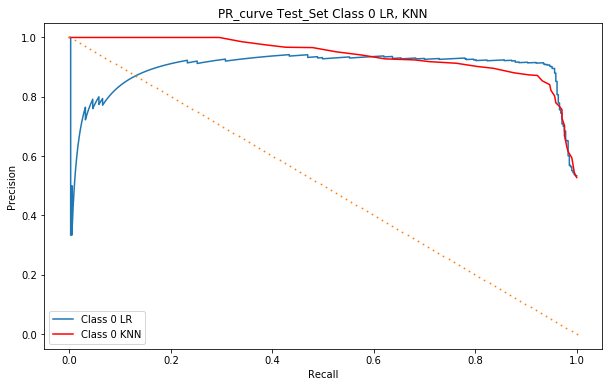

In [288]:
p0lr, r0lr, thresholds0lr = precision_recall_curve(y1_test, y1_score_test[:,0], pos_label = 0)
print("AUC Class 0 LR: %s" % auc(r0lr,p0lr))
p0knn, r0knn, thresholds0knn = precision_recall_curve(y1_test, y_score_test[:,0], pos_label = 0)
print("AUC Class 0 KNN: %s" % auc(r0knn,p0knn))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(r0lr, p0lr, "-", label = "Class 0 LR")
plt.plot(r0knn, p0knn, "-", color = 'r', label = "Class 0 KNN")
plt.plot(x, -x+1, ".", markersize = 1.6)
plt.title("PR_curve Test_Set Class 0 LR, KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

AUC Class 1 LR: 0.9279597593840818
AUC Class 1 KNN: 0.9265247660000664


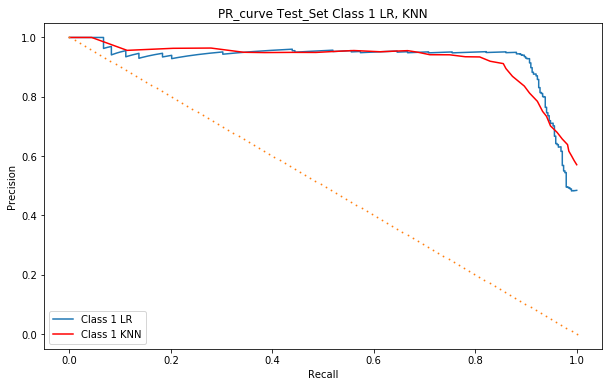

In [289]:
p1lr, r1lr, thresholds1lr = precision_recall_curve(y1_test, y1_score_test[:,1], pos_label = 1)
print("AUC Class 1 LR: %s" % auc(r1lr,p1lr))
p1knn, r1knn, thresholds1knn = precision_recall_curve(y1_test, y_score_test[:,1], pos_label = 1)
print("AUC Class 1 KNN: %s" % auc(r1knn,p1knn))

x = np.linspace(0,1,100)
plt.figure(figsize = (10,6))
plt.plot(r1lr, p1lr, "-", label = "Class 1 LR")
plt.plot(r1knn, p1knn, "-", color = 'r', label = "Class 1 KNN")
plt.plot(x, -x+1, ".", markersize = 1.6)
plt.title("PR_curve Test_Set Class 1 LR, KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

### We observe better results with the KNN model